## STERNUM

In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import scipy.linalg as la
import pywt
import matplotlib.pyplot as plt


## Load the orginal data

In [2]:
DF = pd.read_csv('center_sternum.txt',sep='\t')  
DF

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
0,5,200,1576222772,947.086,435.662,70.638,-6.824428,-14.244280,1.404580,-454,-490,-178,0.792622,0.254952,-0.553850,-0.000031
1,5,200,1576222772,969.168,387.777,88.877,6.183206,-12.290080,-7.969466,-454,-490,-177,0.736461,0.275124,-0.617969,0.006806
2,5,200,1576222772,989.603,380.335,78.751,11.709920,-4.961832,-7.450382,-454,-490,-177,0.729465,0.275246,-0.626118,0.009827
3,5,200,1576222772,954.894,418.033,88.328,17.877860,2.519084,-5.984733,-454,-492,-176,0.723413,0.277200,-0.632221,0.011383
4,5,200,1576222772,972.096,427.732,99.857,25.221370,5.404580,4.015267,-454,-492,-176,0.721948,0.280007,-0.632679,0.010193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16501,5,200,1576222847,958.493,291.092,-54.290,1.664122,2.305344,-0.671756,-494,-449,-126,0.650810,0.379162,-0.636402,0.166356
16502,5,200,1576222847,954.650,288.042,-49.654,1.480916,2.488550,-0.702290,-494,-450,-125,0.650239,0.379803,-0.636708,0.165960
16503,5,200,1576222847,967.338,290.482,-63.867,1.114504,3.374046,-0.900763,-494,-450,-125,0.649365,0.380627,-0.637227,0.165502
16504,5,200,1576222847,965.630,300.852,-56.242,0.702290,3.664122,-1.587786,-495,-448,-124,0.648973,0.381329,-0.637348,0.164953


## Select only the meaningful data

Al fine di selezionare un intervallo significativo dei dati raccolti, è stato eseguito un plot rappresentativo di AccX GyroX MagnX in funzione del tempo. Il tempo (in secondi) associato a ciascuna misura è stato derivato dalla frequenza di campionamento 'Log Freq' 0 200Hz.

Come intervallo signoficativo si è, dunque, tenuto quello compreso tra [7.5,70] s, come mostrato in figura. A questo punto il tempo è stato riscalato, in modo che la prima misurazione significativa corrisponda a 0s.

Text(0, 0.5, 'Magnetic Field [mG?????]')

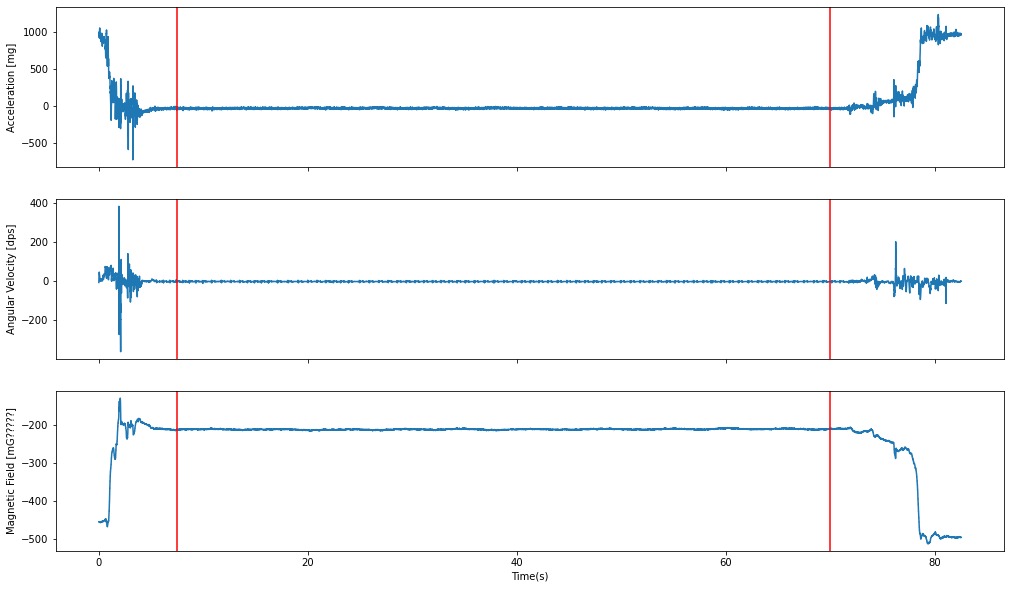

In [3]:
#raw data
(fig, (ax1,ax2,ax3)) = plt.subplots(3,1,figsize=(17,10), sharex=True)

t = np.arange(0, len(DF['AccX']))/DF['Log Freq'][0]
ax1.plot(t, DF['AccX'])
ax1.axvline(x = 7.5, color = 'red')
ax1.axvline(x = 70, color = 'red')
ax1.set_ylabel('Acceleration [mg]')

ax2.plot(t, DF['GyroX'])
ax2.axvline(x = 7.5, color = 'red')
ax2.axvline(x = 70, color = 'red')
ax2.set_ylabel('Angular Velocity [dps]')

ax3.plot(t, DF['MagnX'])
ax3.axvline(x = 7.5, color = 'red')
ax3.axvline(x = 70, color = 'red')
ax3.set_xlabel('Time(s)')
ax3.set_ylabel('Magnetic Field [mG?????]') 


Le colonne di maggior interesse sono quelle contenenti le misurazioni fatte da Accelerometro(mg), Giroscopio(dps) e relativi tempi(s). I dati di magnetometro e quaternioni sono stati scartati in quanto l'ampiezza del segnale non è sufficiente per proseguire nell'analisi, come si vede dal plot di 'MagnX' e 'qw'  in funzione del tempo, per un intervallo di 20s.

Text(0.5, 0, 'Time [s]')

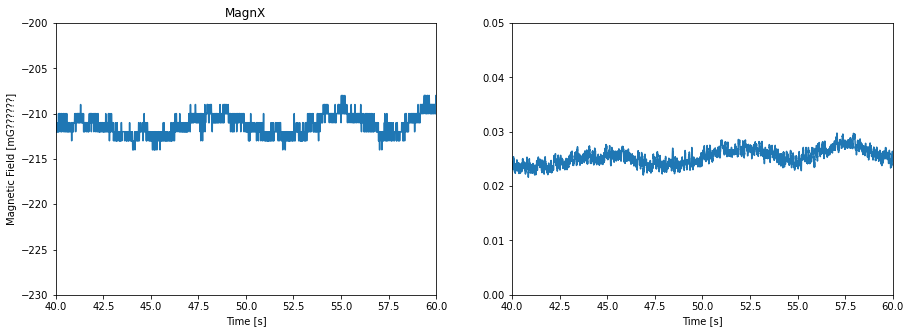

In [4]:
(fig, (ax1,ax2)) = plt.subplots(1,2,figsize=(15,5))

ax1.plot(t,DF['MagnX'])
ax1.set_ylim(-230,-200)
ax1.set_xlim(40,60)
ax1.set_ylabel('Magnetic Field [mG??????]')
ax1.set_title('MagnX')
ax1.set_xlabel('Time [s]')

ax2.plot(t,DF['qw'])       ########
ax2.set_ylim(0,0.05)
ax2.set_xlim(40,60)
ax2.set_xlabel('Time [s]')

In [5]:
#new dataset
a = 1500
b = 14000
freq = DF['Log Freq'][0]
df = DF.iloc[a:b+1]    
df = df.drop(['Log Mode', 'Log Freq', 'Timestamp','qw', 'qi', 'qj', 'qk'], axis=1) #TOGLIERE MAGN???
df['Time'] = np.arange(0, len(df['AccX']))/freq
df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,Time
1500,-24.949,115.046,-951.661,0.687023,4.870229,1.511450,-212,-434,435,0.000
1501,-10.980,106.323,-971.059,1.358779,3.358779,1.099237,-212,-435,435,0.005
1502,-17.690,109.800,-970.022,1.068702,3.160305,0.702290,-213,-435,434,0.010
1503,-21.533,104.249,-965.630,0.687023,2.793893,0.381679,-213,-435,434,0.015
1504,-23.668,104.737,-967.033,0.305343,2.748092,0.778626,-214,-435,435,0.020
...,...,...,...,...,...,...,...,...,...,...
13996,-30.866,118.767,-941.108,-3.175573,3.358779,-0.778626,-210,-430,427,62.480
13997,-32.818,118.279,-942.145,-2.992366,3.679389,-0.549618,-210,-430,427,62.485
13998,-22.692,113.704,-948.184,-3.022901,3.786260,-0.564885,-211,-432,427,62.490
13999,-38.674,119.743,-937.143,-2.854962,3.419847,-0.885496,-211,-432,427,62.495


## Calibration

Di seguito è riportata la procedura di calibrazione eseguita sul dataset.

In [6]:
#calibration matrices and offset vectors
gyro_off = np.array([-2.242224,2.963463,-0.718397])
acc_cal = np.array([[1.000966,-0.002326418,-0.0006995499],
                    [-0.002326379,0.9787045,-0.001540918],
                    [-0.0006995811,-0.001540928,1.00403]])
acc_off = np.array([-3.929942,-13.74679,60.67546])
magn_cal=np.array([[0.9192851,-0.02325168,0.003480837],
                   [-0.02325175,0.914876,0.004257396],
                   [0.003481006,0.004257583,0.8748001]])
magn_off=np.array([-95.67974,-244.9142,17.71132])

In [7]:
#calibration procedure
df[['GyroX','GyroY','GyroZ']] = df[['GyroX','GyroY','GyroZ']] + gyro_off.T
df[['AccX','AccY','AccZ']] = np.dot(df[['AccX','AccY','AccZ']],acc_cal.T) + acc_off.T
df[['MagnX','MagnY','MagnZ']] = np.dot(df[['MagnX','MagnY','MagnZ']],magn_cal.T) + magn_off.T
df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,Time
1500,-28.504953,100.373720,-894.980558,-1.555201,7.833692,0.793053,-278.962788,-635.189046,395.663599,0.000
1501,-14.488596,91.833874,-914.453062,-0.883445,6.322242,0.380840,-278.939536,-636.103922,395.659342,0.005
1502,-21.213892,95.250842,-913.412547,-1.173522,6.123768,-0.016107,-279.862302,-636.084927,394.781061,0.010
1503,-25.050763,89.820226,-908.991605,-1.555201,5.757356,-0.336718,-279.862302,-636.084927,394.781061,0.015
1504,-27.187979,90.304963,-910.399517,-1.936881,5.711555,0.060229,-280.778107,-636.057418,395.652380,0.020
...,...,...,...,...,...,...,...,...,...,...
13996,-34.443708,104.012984,-884.386623,-5.417797,6.322242,-1.497023,-277.245071,-631.610104,388.689191,62.480
13997,-36.395733,103.541515,-885.425685,-5.234590,6.642852,-1.268015,-277.245071,-631.610104,388.689191,62.485
13998,-26.245083,99.049690,-891.489056,-5.265125,6.749723,-1.283282,-278.117853,-633.416605,388.677195,62.490
13999,-42.264295,104.980254,-880.401686,-5.097186,6.383310,-1.603893,-278.117853,-633.416605,388.677195,62.495


## Statistical analysis:

Mean, median, variance, standard deviation, 25th and 75th percentiles:

In [8]:
stat_df = pd.DataFrame({
    'mean'  : df.mean(),
    'median': df.median(),
    'variance': df.var(),
    'standard deviation': df.std(),
    '25% percentile' : df.quantile(q=0.25),
    '75% percentile': df.quantile(q=0.75)
    }).T
stat_df.drop(['Time'], axis=1)

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
mean,-34.309794,100.734210,-892.685252,-4.328721,6.644769,-1.585265,-278.662436,-633.718653,391.202763
median,-34.260318,100.958415,-893.069606,-4.394896,6.597051,-1.573359,-278.962788,-633.416605,391.286894
variance,49.866401,29.206212,212.532768,2.080482,0.532462,0.145359,1.437342,3.149817,6.780515
standard deviation,7.061615,5.404277,14.578504,1.442388,0.729700,0.381260,1.198892,1.774772,2.603942
25% percentile,-38.950034,97.321571,-901.411472,-4.944514,6.230639,-1.832901,-279.099931,-635.184788,388.689191
75% percentile,-29.601040,104.292364,-884.704283,-3.707873,6.963463,-1.344351,-278.046984,-632.478477,393.907037


Correlation coefficients:

In [9]:
M = df.loc[:,:'MagnZ'].corr()  #Pearson   notare correlazioni >0.3
M

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ
AccX,1.000000,-0.175850,-0.406324,0.211097,0.006664,0.027037,-0.380642,-0.022166,0.071081
AccY,-0.175850,1.000000,0.173606,-0.049653,0.000488,-0.103754,0.233688,0.353350,-0.491820
AccZ,-0.406324,0.173606,1.000000,-0.079548,0.117838,0.019098,0.119201,0.202044,-0.247645
GyroX,0.211097,-0.049653,-0.079548,1.000000,0.400553,0.368676,-0.061395,-0.057079,0.024329
GyroY,0.006664,0.000488,0.117838,0.400553,1.000000,0.426017,0.012710,-0.129760,0.021824
GyroZ,0.027037,-0.103754,0.019098,0.368676,0.426017,1.000000,-0.011409,-0.072499,0.012388
MagnX,-0.380642,0.233688,0.119201,-0.061395,0.012710,-0.011409,1.000000,0.216823,-0.307836
MagnY,-0.022166,0.353350,0.202044,-0.057079,-0.129760,-0.072499,0.216823,1.000000,-0.744287
MagnZ,0.071081,-0.491820,-0.247645,0.024329,0.021824,0.012388,-0.307836,-0.744287,1.000000


## PCA

Dal momento che le misurazioni di accelerazione e velocità angolare sono state fatte lungo i tre assi, si è applicata l'analisi PCA per stabilire quale di queste componenti portasse l'informazione maggiore.

In [10]:
cov_mat_acc=np.cov(df[['AccX','AccY','AccZ']].T)
a,b=la.eig(cov_mat_acc)

cov_mat_gyro=np.cov(df[['GyroX','GyroY','GyroZ']].T)
c,d=la.eig(cov_mat_gyro)

cov_mat_magn=np.cov(df[['MagnX','MagnY','MagnZ']].T)
e,f=la.eig(cov_mat_magn)

In [11]:
print('eigenvalues and eigenvectors (Acc): \n', a, '\n\n',b, '\n')
print('eigenvalues and eigenvectors (Gyro): \n', c, '\n\n',d, '\n')
print('eigenvalues and eigenvectors (Magn): \n', e, '\n\n',f, '\n')

eigenvalues and eigenvectors (Acc): 
 [223.79621083+0.j  40.60562833+0.j  27.20354118+0.j] 

 [[ 0.23593172 -0.93513285 -0.26431569]
 [-0.07623228  0.25334565 -0.96436747]
 [-0.96877493 -0.24767426  0.01151503]] 

eigenvalues and eigenvectors (Gyro): 
 [2.21252496+0.j 0.43814605+0.j 0.10763217+0.j] 

 [[ 0.96234803  0.26653218 -0.05335597]
 [ 0.2491525  -0.94340978 -0.21886303]
 [ 0.10867058 -0.19732864  0.9742957 ]] 

eigenvalues and eigenvectors (Magn): 
 [9.00334116+0.j 1.32824113+0.j 1.03609186+0.j] 

 [[ 0.13892355  0.9203879   0.36549468]
 [ 0.5098297  -0.38287722  0.7703757 ]
 [-0.84898406 -0.07931672  0.52243175]] 



Le prima componente principale comprende il tot% di variabilità.

I dati sono stati ruotati nel nuovo sistema di riferimento:

In [12]:
#rotation
rot = np.dot(df[['AccX','AccY','AccZ']],b)
rot1 = np.dot(df[['GyroX','GyroY','GyroZ']],d)
rot2 = np.dot(df[['MagnX','MagnY','MagnZ']],f)
dfr = pd.DataFrame({'Acc1': rot[:,0], 'Acc2': rot[:,1],'Acc3': rot[:,2],
                    'Gyro1': rot1[:,0], 'Gyro2': rot1[:,1],'Gyro3': rot1[:,2],
                    'Magn1': rot2[:,0], 'Magn2': rot2[:,1],'Magn3': rot2[:,2]})

dfr['Time'] = df['Time'].values
dfr


,Acc1,Acc2,Acc3,Gyro1,Gyro2,Gyro3,Magn1,Magn2,Magn3,Time
0,852.657787,273.748810,-99.568575,0.541321,-7.961385,-0.858858,-698.504826,-44.937294,-384.586391,0.000
1,875.480177,263.300959,-95.261995,0.766407,-6.275082,-0.965517,-698.964412,-44.565270,-385.284915,0.005
2,872.624958,270.197970,-96.767624,0.394665,-6.086826,-1.293345,-698.337276,-45.352183,-386.066390,0.010
3,867.850809,271.315177,-90.465462,-0.098776,-5.779613,-1.505156,-698.337276,-45.352183,-386.066390,0.015
4,868.673569,273.785268,-90.384239,-0.434360,-5.916463,-1.088023,-699.190213,-46.274721,-385.924715,0.020
...,...,...,...,...,...,...,...,...,...,...
12496,840.716080,277.600482,-101.386466,-3.801286,-7.113077,-2.553176,-690.520383,-44.173436,-384.845098,62.480
12497,841.298093,279.563788,-100.427811,-3.520210,-7.411902,-2.410000,-690.520383,-44.173436,-384.845098,62.485
12498,849.909417,270.435339,-98.848838,-3.524627,-7.517852,-2.446636,-691.552456,-44.284115,-386.562046,62.490
12499,834.936711,284.171856,-100.206280,-3.489145,-7.064147,-2.687772,-691.552456,-44.284115,-386.562046,62.495


Text(0.5, 0, 'Time(s)')

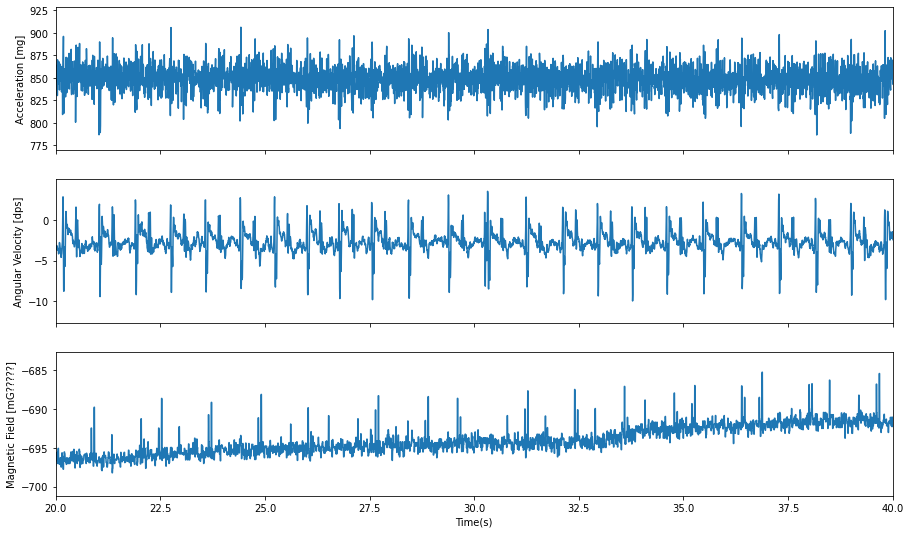

In [13]:
#principal components plots
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(15,9),sharex=True)
ax[0].plot(dfr['Time'],dfr['Acc1'])
ax[0].set_ylabel('Acceleration [mg]')
ax[1].plot(dfr['Time'],dfr['Gyro1'])
ax[1].set_ylabel('Angular Velocity [dps]')
ax[2].plot(dfr['Time'],dfr['Magn1'])
ax[2].set_ylabel('Magnetic Field [mG?????]')

ax[2].set_xlim(20,40)
ax[2].set_xlabel('Time(s)')


## FFT analysis

Per ciascuna componente principale è stata calcolata la FFT per evidenziare la frequenza cardiaca nello spettro, tra 40BPM e 100BPM.

1.1519078473722102
1.1519078473722102


Text(0.5, 0, 'Frequencies [Hz]')

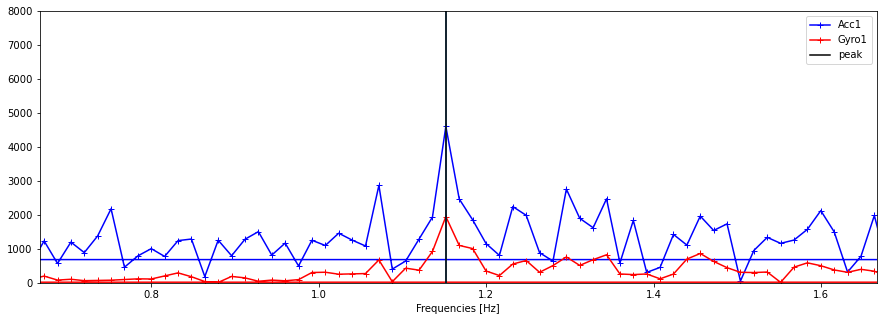

In [14]:
#select heart-beat freq
min_f=40./60.
max_f=100./60.

A1_FFT = np.abs(np.fft.fft(dfr['Acc1']-np.mean(dfr['Acc1'])))
G1_FFT = np.abs(np.fft.fft(dfr['Gyro1']-np.mean(dfr['Gyro1'])))

freq_FFT = np.fft.fftfreq(d=1/freq, n=len(A1_FFT))

X=[]
YA=[]
YG=[]
for i in range(len(A1_FFT)):
    if freq_FFT[i]<=max_f and freq_FFT[i]>=min_f:
        X.append(freq_FFT[i])
        YA.append(A1_FFT[i])
        YG.append(G1_FFT[i])
        
peakA,_ = signal.find_peaks(YA, height=4000)
peakG,_ = signal.find_peaks(YG, height=1500)
print(X[peakA[0]])
print(X[peakG[0]])
#print(X[peakG[0]]*60)

plt.figure(figsize = (15,5))
plt.plot(freq_FFT, A1_FFT,'b-+', label='Acc1')
plt.plot(freq_FFT, G1_FFT,'r-+', label='Gyro1')
plt.axvline(x = X[peakA[0]])
plt.axvline(x = X[peakG[0]], color='k', label='peak')
plt.xlim(min_f, max_f)
plt.ylim(0,8000)
plt.legend(loc='best')
plt.xlabel('Frequencies [Hz]')

Dallo spettro si nota chiaramente un picco, coincidente per entrambi i dataset, attorno a 1.15, che corrisponde ad un BPM di 69.

## SIGNAL FILTERING

Il segnale è stato pulito con una serie di filtri, in modo da evidenziare il battito cardiaco. 

- wavelet transform
- Hilbert envelop
- Butterworth filter (40-200)BPM


In [15]:
sigA = dfr['Acc1']
sigG = dfr['Gyro1']
sigM = dfr['Magn1']
t = dfr['Time']

## Accelerometer

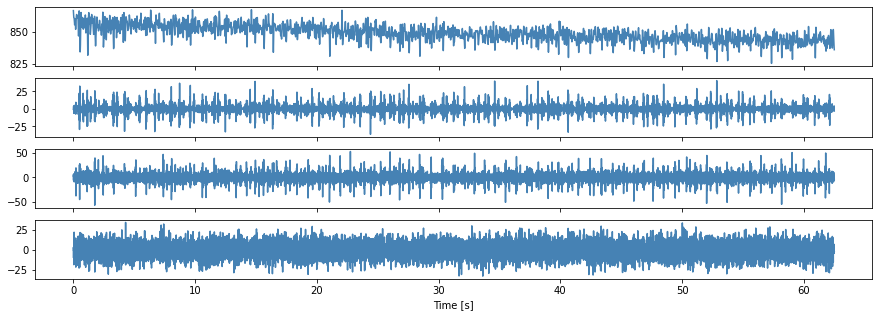

In [27]:
# WAVELET ACC
n = 3
cA = pywt.wavedec(sigA, 'bior5.5', level = n)
sigs = np.zeros((n+1,len(t)+1))
for i in range(n+1):
    ca = cA.copy()
    for j in range(n+1):
        if j != i: 
            ca[j] = np.zeros_like(ca[j])
    sigs[i] = pywt.waverec(ca, 'bior5.5')

ax = []
fig, ax = plt.subplots(nrows = n+1, ncols = 1, figsize = (15, 5), sharex=True)
ax[n].set_xlabel('Time [s]')
for i in range(n+1):
    ax[i].plot(t, sigs[i][:-1], color = 'steelblue')

Text(0.5, 0, 'Time [s]')

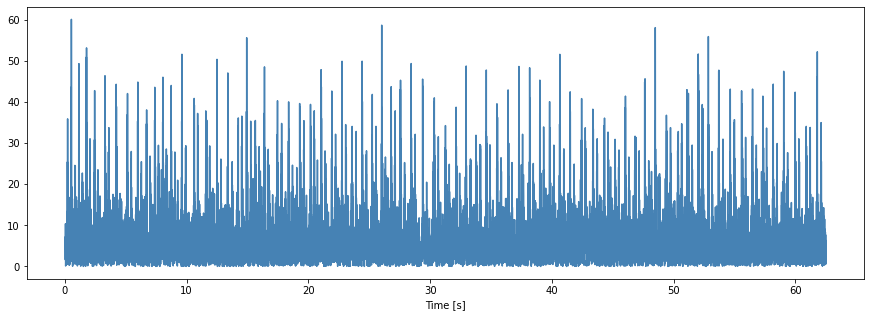

In [17]:
ca = cA.copy()
for j in range(n+1):
    if (j!=1) & (j!=2): 
        ca[j] = np.zeros_like(ca[j])
sigA_w = pywt.waverec(ca, 'bior5.5')

plt.figure(figsize=(15,5))
plt.plot(t, np.abs(sigA_w[:-1]), color = 'steelblue')
plt.xlabel('Time [s]')

Text(0.5, 0, 'Time [s]')

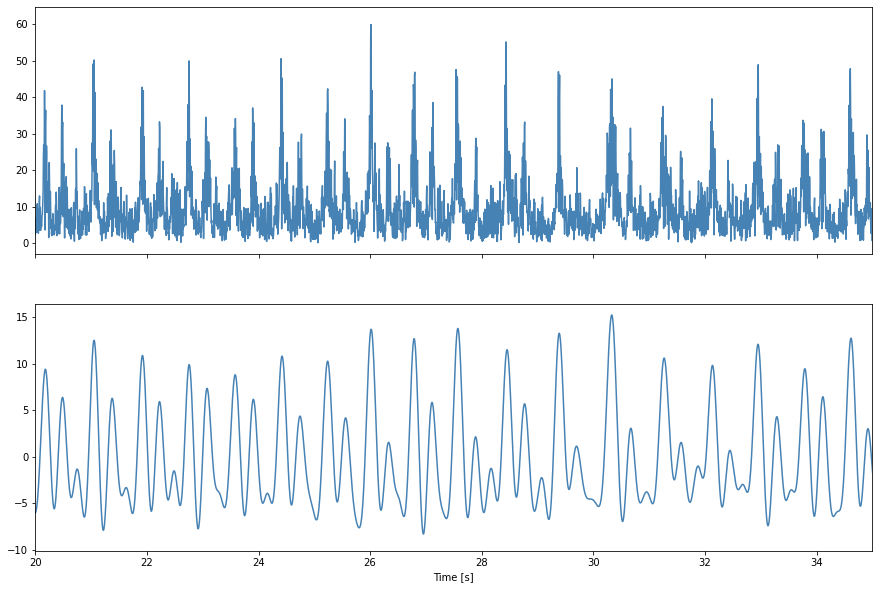

In [18]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,10), sharex=True)

# Hilbert
SIG = np.abs(sigA_w[:-1])
SIG_h = signal.hilbert(SIG)
#ax1.plot(t, SIG[:])
ax1.plot(t, np.abs(SIG_h[:]), color = 'steelblue')

# Butterworth
b, a = signal.butter(4, Wn=[0.67/100, 4/100], btype='bandpass')
filtered_data_butterworth = signal.filtfilt(b, a, np.abs(SIG_h))
ax2.plot(t, filtered_data_butterworth[:], color = 'steelblue')
ax2.set_xlim(20, 35)
ax2.set_xlabel('Time [s]')

## Gyroscope

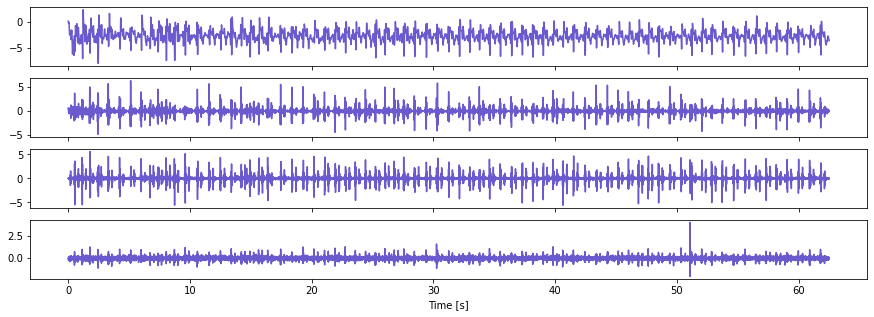

In [19]:
# WAVELET GYRO
n = 3
cG = pywt.wavedec(sigG, 'bior5.5', level = n)
sigs = np.zeros((n+1,len(t)+1))
for i in range(n+1):
    ca = cG.copy()
    for j in range(n+1):
        if j != i: 
            ca[j] = np.zeros_like(ca[j])
    sigs[i] = pywt.waverec(ca, 'bior5.5')

ax = []
fig, ax = plt.subplots(nrows = n+1, ncols = 1, figsize = (15, 5), sharex=True)
ax[n].set_xlabel('Time [s]')
for i in range(n+1):
    ax[i].plot(t, sigs[i][:-1], color = 'slateblue')

Text(0.5, 0, 'Time [s]')

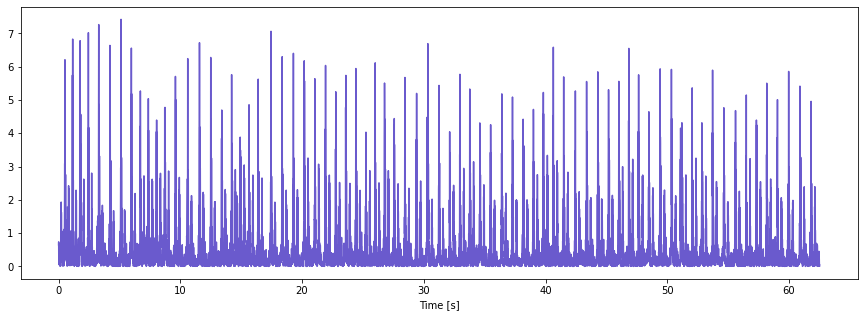

In [20]:
ca = cG.copy()
for j in range(n+1):
    if (j!=1) & (j!=2): 
        ca[j] = np.zeros_like(ca[j])
sigG_w = pywt.waverec(ca, 'bior5.5')

plt.figure(figsize=(15,5))
plt.plot(t, np.abs(sigG_w[:-1]), color = 'slateblue')
plt.xlabel('Time [s]')

Text(0.5, 0, 'Time [s]')

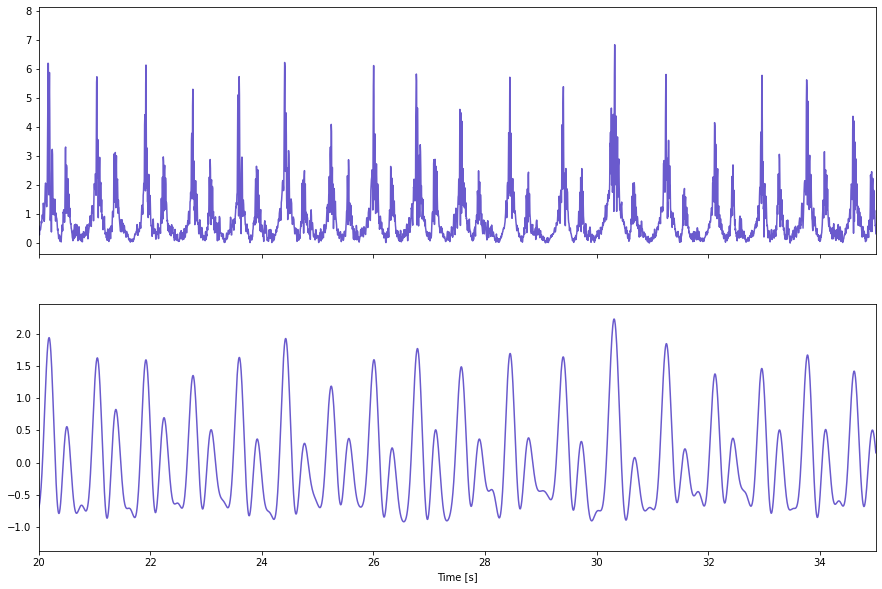

In [21]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,10), sharex=True)

# Hilbert
SIG = np.abs(sigG_w[:-1])
SIG_h = signal.hilbert(SIG)
#ax1.plot(t, SIG[:])
ax1.plot(t, np.abs(SIG_h[:]), color = 'slateblue')

# Butterworth
b, a = signal.butter(4, Wn=[0.67/100, 4/100], btype='bandpass')
filtered_data_butterworth = signal.filtfilt(b, a, np.abs(SIG_h))
ax2.plot(t, filtered_data_butterworth[:], color = 'slateblue')
ax2.set_xlim(20, 35)
ax2.set_xlabel('Time [s]')

## Magnetometer

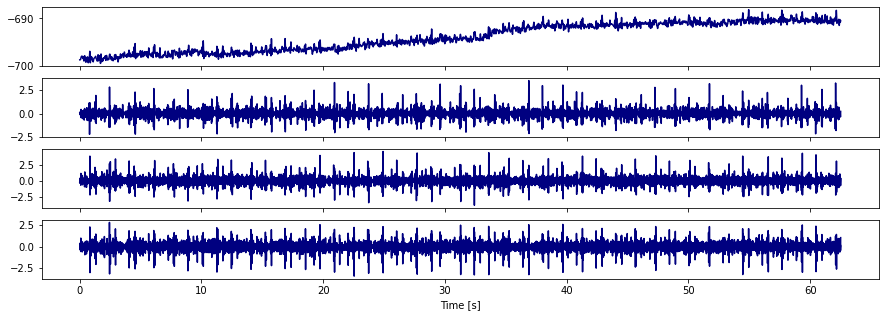

In [22]:
# WAVELET MAGN
n = 3
cM = pywt.wavedec(sigM, 'bior5.5', level = n)
sigs = np.zeros((n+1,len(t)+1))
for i in range(n+1):
    ca = cM.copy()
    for j in range(n+1):
        if j != i: 
            ca[j] = np.zeros_like(ca[j])
    sigs[i] = pywt.waverec(ca, 'bior5.5')

ax = []
fig, ax = plt.subplots(nrows = n+1, ncols = 1, figsize = (15, 5), sharex=True)
ax[n].set_xlabel('Time [s]')
for i in range(n+1):
    ax[i].plot(t, sigs[i][:-1], color = 'navy')

Text(0.5, 0, 'Time [s]')

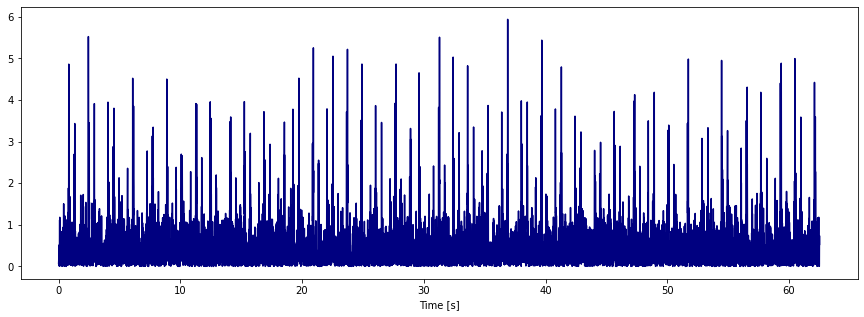

In [23]:
ca = cM.copy()
for j in range(n+1):
    if (j!=1) & (j!=2): 
        ca[j] = np.zeros_like(ca[j])
sigM_w = pywt.waverec(ca, 'bior5.5')

plt.figure(figsize=(15,5))
plt.plot(t, np.abs(sigM_w[:-1]), color = 'navy')
plt.xlabel('Time [s]')

Text(0.5, 0, 'Time [s]')

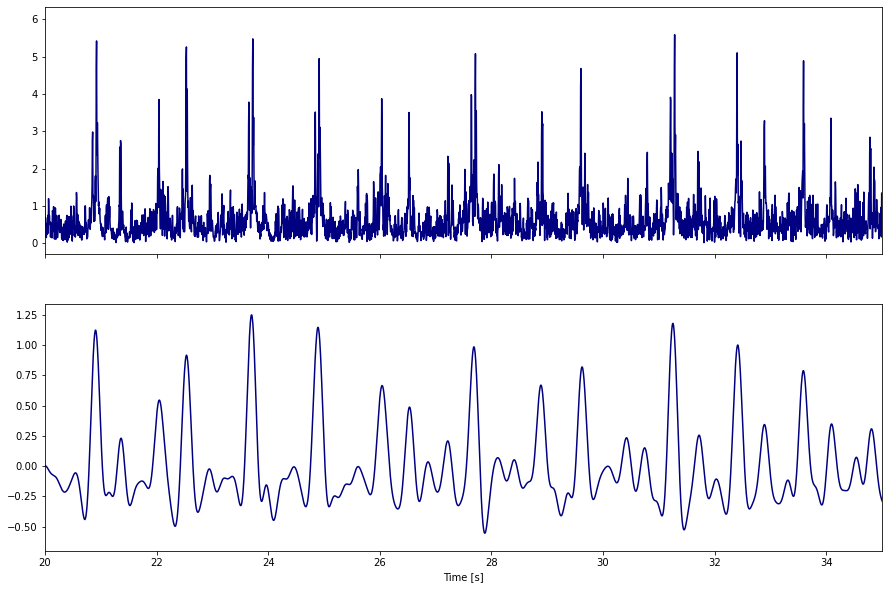

In [24]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,10), sharex=True)

# Hilbert
SIG = np.abs(sigM_w[:-1])
SIG_h = signal.hilbert(SIG)
#ax1.plot(t, SIG[:])
ax1.plot(t, np.abs(SIG_h[:]), color = 'navy')

# Butterworth
b, a = signal.butter(4, Wn=[0.67/100, 4/100], btype='bandpass')
filtered_data_butterworth = signal.filtfilt(b, a, np.abs(SIG_h))
ax2.plot(t, filtered_data_butterworth[:], color = 'navy')
ax2.set_xlim(20, 35)
ax2.set_xlabel('Time [s]')